#IMPLEMENTING CNN USING NUMPY

#Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

#DEFINING ACTIVATION FUNCTIONS

In [2]:
clipping_val = 0.05
def sigmoid(x, derive=False): # the real sigmoid function
    if derive:
        tmp = x * (1 - x)  
        x_der = (tmp > clipping_val) * tmp + (tmp < clipping_val) * clipping_val
        return x_der
    return 1 / (1 + np.exp(-x))

def tanh(x, derive=False):
    if derive:
        return (1 - x) * (1 + x)
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def relu(x, derive=False):
    if derive:
        return 1. * (x > 0)
    return x * (x > 0)

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def imshow(x):
    pixels = x[:28*28].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

#LOADING DATASET

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
N_train = x_train.shape[0] # total number of training examples
N_test = x_test.shape[0] # total number of testing examples

print('MNIST Train data shape is: ' + str(x_train.shape))
print('MNIST Train data shape is: ' + str(y_train.shape))
print('MNIST Test data shape is: ' + str(x_test.shape))
print('MNIST Test data shape is: ' + str(y_test.shape))

11490434/11490434 [==============================] - 0s 0us/step
MNIST Train data shape is: (60000, 28, 28)
MNIST Train data shape is: (60000,)
MNIST Test data shape is: (10000, 28, 28)
MNIST Test data shape is: (10000,)


#Visualizing the Dataset

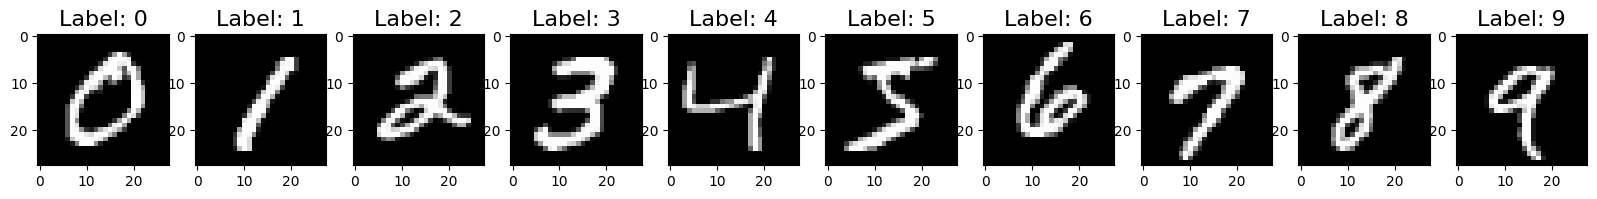

In [5]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [6]:
x_train = np.concatenate((x_train.transpose([1,2,0]).reshape([-1,N_train]),np.ones([1,N_train])),axis=0)
x_test = np.concatenate((x_test.transpose([1,2,0]).reshape([-1,N_test]),np.ones([1,N_test])),axis=0)

#y_train, y_test
x_train_label = np.zeros((N_train, 10))
x_test_label = np.zeros((N_test, 10))
x_train_label[np.arange(N_train), y_train] = 1
x_test_label[np.arange(N_test), y_test] = 1

print('x_train shape is: ' + str(x_train.shape))
print('x_train_label shape is: ' + str(x_train_label.T.shape))
print('x_test shape is: ' + str(x_test.shape))
print('x_test_label shape is: ' + str(x_test_label.T.shape))

x_train shape is: (785, 60000)
x_train_label shape is: (10, 60000)
x_test shape is: (785, 10000)
x_test_label shape is: (10, 10000)


In [ ]:
x_train = x_train / 255
x_test = x_test / 255

TrainData = np.concatenate((x_train,x_train_label.T), axis=0)
TestData = np.concatenate((x_test,x_test_label.T), axis=0)
print('TrainData shape is: ' + str(TrainData.shape))
print('TestData shape is: ' + str(TestData.shape))


TrainData shape is: (795, 60000)
TestData shape is: (795, 10000)


#TEST IMAGE

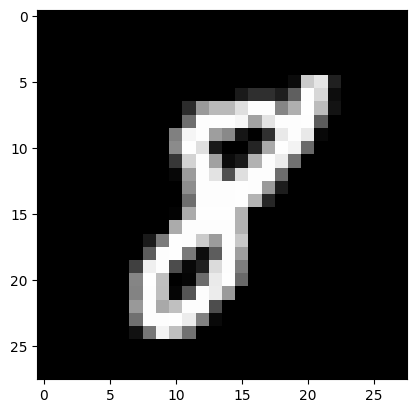

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
random_num = 17
imshow(TrainData[:,random_num])
print(TrainData[785:,random_num])

#WEIGHTS INITIALIZATION

In [ ]:
np.random.seed(2019)
kernel_size = 7
kernel_num = 16
k_w = np.random.normal(0,1,(kernel_size * kernel_size + 1, kernel_num)) * 0.01
h1_w = np.random.normal(0,1,((28 - kernel_size + 1)*(28 - kernel_size + 1)*(kernel_num) + 1, 10)) * 0.01

# mini-batch 
mini_batch = 1
k_w_tmp = np.zeros_like(k_w)
h1_w_tmp = np.zeros_like(h1_w)

print('16 kernel weight shape is: ' + str(k_w.shape))
print('First fully connected layer weight shape is: ' + str(h1_w.shape))

16 kernel weight shape is: (50, 16)
First fully connected layer weight shape is: (7745, 10)


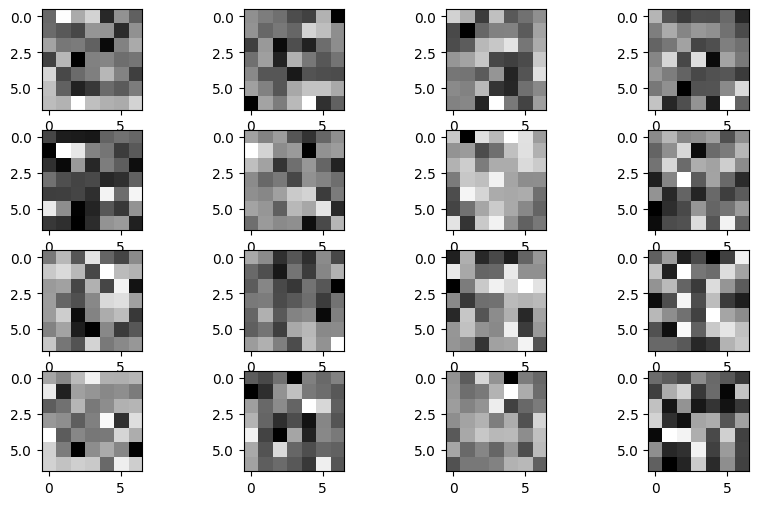

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10,6))
k_w_start = np.reshape(k_w[:-1,:],[kernel_size,kernel_size,-1])
n=0;
for row in ax:
    for col in row:
        col.imshow(k_w_start[:,:,n], cmap='gray')
        n=n+1

plt.show()

The 1 epoch error is: [8248.43124261]
The 2 epoch error is: [3656.45882428]
The 3 epoch error is: [2598.59451109]
The 4 epoch error is: [1952.96360897]
The 5 epoch error is: [1575.89042878]
The 6 epoch error is: [1251.05724421]
The 7 epoch error is: [1045.03205442]
The 8 epoch error is: [706.39663361]
The 9 epoch error is: [504.03864289]
The 10 epoch error is: [391.52412176]
The 11 epoch error is: [294.13446395]
The 12 epoch error is: [245.99856668]
The 13 epoch error is: [198.62323449]
The 14 epoch error is: [122.10618669]
The 15 epoch error is: [68.26515157]
The 16 epoch error is: [54.15667396]
The 17 epoch error is: [15.43037584]
The 18 epoch error is: [10.57585135]
The 19 epoch error is: [8.83153591]
The 20 epoch error is: [7.8968095]
The 21 epoch error is: [7.29653557]
The 22 epoch error is: [6.79280079]
The 23 epoch error is: [6.38478492]
The 24 epoch error is: [6.05340824]
The 25 epoch error is: [5.74383572]
The 26 epoch error is: [5.45190194]
The 27 epoch error is: [5.23027752]

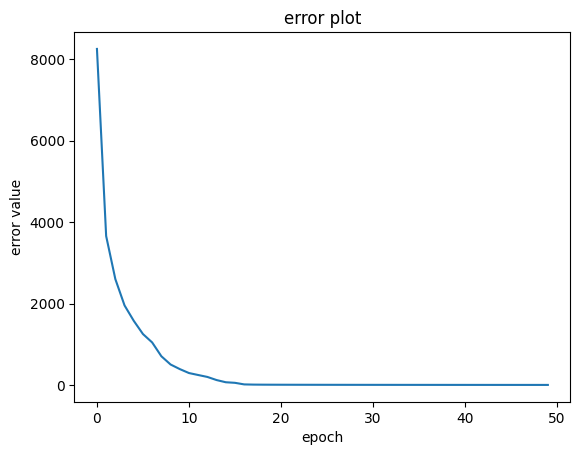

In [ ]:
# learning rate
eta = 0.01

epoch = 50
err = np.zeros((epoch, 1))
inds = np.arange(0,TrainData.shape[1],1)

for k in range(epoch):
    
    # init error
    err[k] = 0
    
    # random shuffle of data each epoch
    inds = np.random.permutation(inds)
    for i in range(TrainData.shape[1]):
        
        # random index
        inx = inds[i]
        
        # one image
        img = np.reshape(TrainData[:28*28, inx], [28, 28])
        
        # forwards pass        
        # transform matrix C
        C = np.ones((28 - kernel_size + 1, 28 - kernel_size + 1, kernel_size * kernel_size))

        for m in range(kernel_size):
            for n in range(kernel_size):
                C[:,:,m * kernel_size + n] = img[m:m+(28 - kernel_size + 1),n:n+(28 - kernel_size + 1)]
        C=np.concatenate((C, np.ones([28 - kernel_size + 1, 28 - kernel_size + 1,1])),axis=2)
        
        h = relu(np.dot(C, k_w)) # 22 x 22 x 16
        
        h = np.reshape(h, [(28 - kernel_size + 1)*(28 - kernel_size + 1)*(kernel_num), 1])
        h = np.concatenate((h,np.asarray([[1]])),axis=0)
        #o = sigmoid(np.dot(h.T, h1_w))
        o = softmax(np.dot(h.T, h1_w))
        
        # MSE error
        #err[k] = err[k] + 0.5 * np.sum((o - TrainData[785:,inx]) ** 2)
        
        # cross entropy
        err[k] = err[k] + (-1.0) * np.sum(TrainData[785:,inx] * np.log(o + 10 ** -8))
        
        # backprop < ---
        
        # output layer
        delta_1 = (-1.0) * (TrainData[785:,inx] - o) # (1, 10)
        #delta_2 = sigmoid(o, derive=True) # (1, 10)
        delta_2 = np.ones_like(delta_1) # cross entropy
        
        
        # update the fully connected hidden layer
        delta_hw = np.dot(h, delta_1 * delta_2)  # (22 * 22 * 16 + 1, 10)
        
        # update the convolutional kernel
        delta_3 = relu(h, derive=True) # (22 * 22 * 16 + 1, 1)
        delta_kw_tmp = np.sum(np.dot(delta_3, delta_1 * delta_2) * h1_w,axis=1)[:-1].reshape([(28 - kernel_size + 1),(28 - kernel_size + 1),kernel_num])
        delta_kw = np.dot(np.transpose(C,axes=[2,0,1]).reshape([k_w.shape[0],-1]), delta_kw_tmp.reshape([-1,kernel_num]))

        # mini-batch tmp value 
        h1_w_tmp = h1_w_tmp + (-1.0) * eta * delta_hw # (22 * 22 * 16 + 1, 10)
        k_w_tmp = k_w_tmp + (-1.0) * eta * delta_kw # (7 * 7 + 1, 16)
        
        # update rule
        if((k * TrainData.shape[1] + i) % mini_batch == 0):
            h1_w = h1_w + h1_w_tmp / mini_batch
            k_w = k_w + k_w_tmp / mini_batch
            h1_w_tmp = np.zeros_like(h1_w_tmp)
            k_w_tmp = np.zeros_like(k_w_tmp)

    print('The ' + str(k+1) + ' epoch error is: ' + str(err[k]))
    
        
# plot it        
fig = plt.figure()
plt.plot(err)
plt.title('error plot')
plt.xlabel('epoch')
plt.ylabel('error value')
plt.show()
fig.savefig('conv_10.png', dpi=fig.dpi)

#TRAINING ACCURACY

In [ ]:
# Look at the training data
train_acc = 0
for i in range(TrainData.shape[1]):

    # one image
    img = np.reshape(TrainData[:28*28, i], [28, 28])
    #imshow(img)
    # forwards pass        
    # transform matrix C
    C = np.ones((28 - kernel_size + 1, 28 - kernel_size + 1, kernel_size * kernel_size))
    for m in range(kernel_size):
        for n in range(kernel_size):
            C[:,:,m * kernel_size + n] = img[m:m+(28 - kernel_size + 1),n:n+(28 - kernel_size + 1)]
    C=np.concatenate((C, np.ones([28 - kernel_size + 1, 28 - kernel_size + 1,1])),axis=2)

    h = relu(np.dot(C, k_w)) # 22 x 22 x 16
    #print(sum(sum(sum(h))))
    
    # hidden layer(s)
    h = np.reshape(h, [(28 - kernel_size + 1)*(28 - kernel_size + 1)*(kernel_num), 1])
    h = np.concatenate((h,np.asarray([[1]])),axis=0)
    #o = sigmoid(np.dot(h.T, h1_w))
    o = softmax(np.dot(h.T, h1_w))
    oo = np.reshape(np.zeros([1,10]),[10,])
    oo[np.argmax(o)] = 1
        
    #print(str(i) + ": produced: " + str(o) + " wanted " + str(TrainData[785:,i]))
    if(np.array_equal(TrainData[785:,i],oo)):
        train_acc = train_acc + 1

print('The training accuracy is ', train_acc / TrainData.shape[1])
    

The training accuracy is  1.0


#TESTING ACCURACY

In [ ]:
# Look at the testing data
test_acc = 0
for i in range(TestData.shape[1]):

    # one image
    img = np.reshape(TestData[:28*28, i], [28, 28])
    #imshow(img)
    # forwards pass        
    # transform matrix C
    C = np.ones((28 - kernel_size + 1, 28 - kernel_size + 1, kernel_size * kernel_size))
    for m in range(kernel_size):
        for n in range(kernel_size):
            C[:,:,m * kernel_size + n] = img[m:m+(28 - kernel_size + 1),n:n+(28 - kernel_size + 1)]
    C=np.concatenate((C, np.ones([28 - kernel_size + 1, 28 - kernel_size + 1,1])),axis=2)

    h = relu(np.dot(C, k_w)) # 22 x 22 x 16
    #print(sum(sum(sum(h))))
    
    # hidden layer(s)
    h = np.reshape(h, [(28 - kernel_size + 1)*(28 - kernel_size + 1)*(kernel_num), 1])
    h = np.concatenate((h,np.asarray([[1]])),axis=0)
    #o = sigmoid(np.dot(h.T, h1_w))
    o = softmax(np.dot(h.T, h1_w))
    oo = np.reshape(np.zeros([1,10]),[10,])
    oo[np.argmax(o)] = 1
        
    #print(str(i) + ": produced: " + str(oo) + " wanted " + str(TestData[785:,i]))
    if(np.array_equal(TestData[785:,i],oo)):
        test_acc = test_acc + 1

print('The testing accuracy is ', test_acc / TestData.shape[1])

The testing accuracy is  0.9872


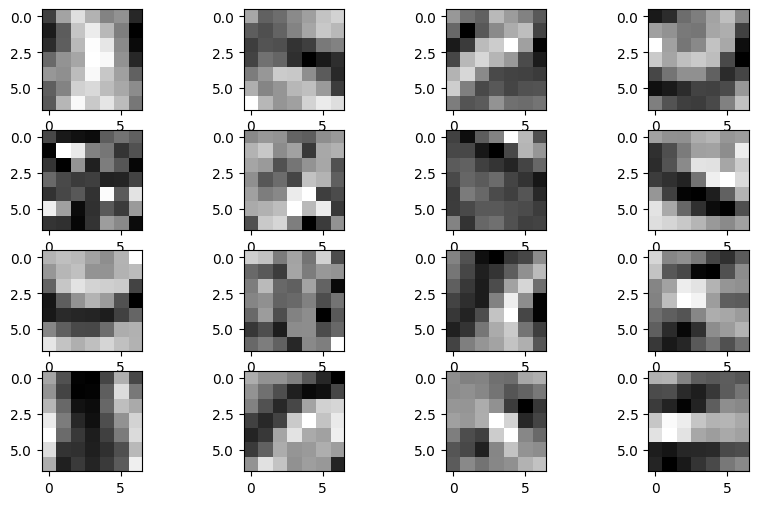

In [ ]:
# look at the final kernel
k_w_final = k_w[:-1,:].reshape([7,7,16])
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10,6))

n=0;
for row in ax:
    for col in row:
        col.imshow(k_w_final[:,:,n], cmap='gray')
        n=n+1

plt.show()

#DECONVOLUTION

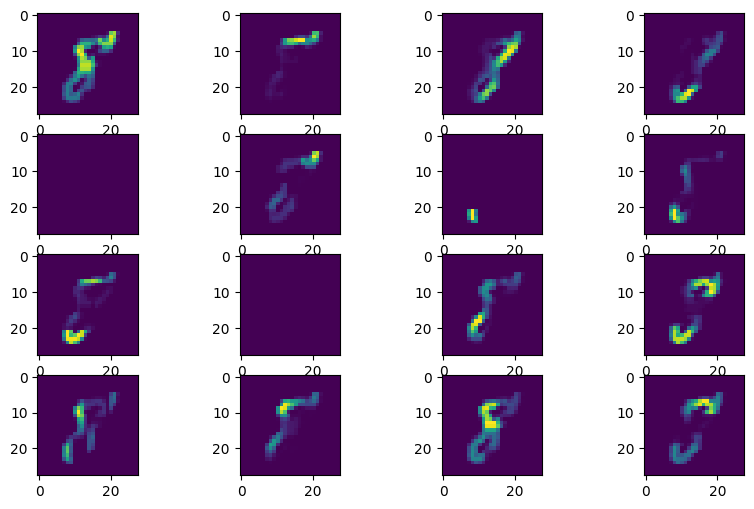

In [ ]:
# deconvolution
selected_img = 17
img = np.reshape(TrainData[:28*28, selected_img], [28, 28])
recovered_img = np.zeros([28, 28, 16])

C = np.ones((28 - kernel_size + 1, 28 - kernel_size + 1, kernel_size * kernel_size))
for m in range(kernel_size):
    for n in range(kernel_size):
        C[:,:,m * kernel_size + n] = img[m:m+(28 - kernel_size + 1),n:n+(28 - kernel_size + 1)]
C=np.concatenate((C, np.ones([28 - kernel_size + 1, 28 - kernel_size + 1,1])),axis=2)

h = relu(np.dot(C, k_w)) # 22 x 22 x 16

for i in range(kernel_num):
    for m in range(kernel_size):
        for n in range(kernel_size):
            recovered_img[m:m+22, n:n+22, i] = recovered_img[m:m+22, n:n+22, i] + h[:,:,i] * C[:,:,m * kernel_size + n] / (kernel_size ** 2)


# look at the de-convolution image
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10,6))

n=0;
for row in ax:
    for col in row:
        col.imshow(recovered_img[:,:,n])
        n=n+1

plt.show()

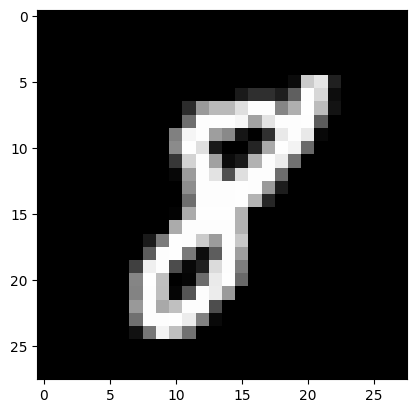

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
# random select a number to see if the image match the label
random_num = 17
imshow(TrainData[:,random_num])
print(TrainData[785:,random_num])